<a href="https://colab.research.google.com/github/mebirtukan/EyeMovementEventDetectionAlgorithms/blob/main/I_VT_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from scipy.io import loadmat
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.sequence import  TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, cohen_kappa_score



In [ ]:
!wget www.kasprowski.pl/datasets/events.zip
!unzip events.zip > xx

--2022-10-31 20:07:21--  http://www.kasprowski.pl/datasets/events.zip
Resolving www.kasprowski.pl (www.kasprowski.pl)... 94.152.164.213
Connecting to www.kasprowski.pl (www.kasprowski.pl)|94.152.164.213|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2909538 (2.8M) [application/zip]
Saving to: ‘events.zip’

events.zip          100%[===================>]   2.77M  2.78MB/s    in 1.0s    

2022-10-31 20:07:22 (2.78 MB/s) - ‘events.zip’ saved [2909538/2909538]



In [ ]:
def openfile(filename):
  mat = loadmat(filename)
  mdata = mat['ETdata']
  mtype = mdata.dtype
  ndata = {n: mdata[n][0,0] for n in mtype.names}
  data_headline = ndata['pos']
  data_headline = data_headline[0]
  data_raw = ndata['pos']
  pdata = pd.DataFrame(data_raw,columns=data_headline)
  df=pd.DataFrame(pdata)
  df[1.0]=df[1.0].astype(int)
  #t=pdata.iloc[:, 0].values maybe we shoud use it...
  x=pdata.iloc[:, 3:5].values
  y=pdata.iloc[:, 5].values
  print("File",filename,"opened")
  return x ,y

In [ ]:
## we don't use it here for now
def open_list_of_files(files_to_load):
  samples = []
  labels =[]
  for my_file in files_to_load:
    sam,lab = openfile(my_file)
    #ssam,slab = make_sequences(sam,lab,50)
    print('Number of samples so far:',len(samples))
    samples.extend(sam)
    labels.extend(lab)
  samples = np.array(samples)
  labels = np.array(labels)
  print('Number of samples at the end:',len(samples))
  return samples,labels
files_to_load = ['data/UH33_img_vy_labelled_MN.mat','data/UH47_img_Europe_labelled_RA.mat','data/UH21_img_Rome_labelled_MN.mat']
#files_to_load = ['data/TH34_img_Europe_labelled_MN.mat', 'data/UH21_img_Rome_labelled_RA.mat', 'data/UH47_img_Europe_labelled_MN.mat', 'data/UH27_img_vy_labelled_MN.mat']

#s,l = open_list_of_files(files_to_load)
x,y=open_list_of_files(files_to_load)
#print(x.shape)
#print(y.shape)
#print(s1.shape)
#print(l1.shape)

File data/UH33_img_vy_labelled_MN.mat opened
Number of samples so far: 0
File data/UH47_img_Europe_labelled_RA.mat opened
Number of samples so far: 4988
File data/UH21_img_Rome_labelled_MN.mat opened
Number of samples so far: 6985
Number of samples at the end: 11973


In [ ]:
#len(y1)

In [ ]:
#x,y=openfile('data/UH21_img_Rome_labelled_RA.mat')

#x,y=openfile('UH21_video_BergoDalbana_labelled_MN.mat')
#x,y=openfile('UH29_video_dolphin_fov_labelled_RA.mat')
#x,y=openfile('data/UH33_img_vy_labelled_MN.mat')
#x,y=openfile('data/UH29_video_dolphin_fov_labelled_RA.mat')

In [ ]:
import math

In [ ]:
! pip install atan2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement atan2 (from versions: none)
ERROR: No matching distribution found for atan2


In [ ]:
import csv
import numpy as np

# we assume that the frequency is 500Hz so there is 2ms gap between every two samples
def ivt(data,v_threshold,verbose=0):
  Xs = data[:,[0]]
  Ys = data[:,[1]]

  diffX = [] #x values difference
  diffY = [] #y values difference 

  for i in range(len(data) - 1):
    diffX.append(float(Xs[i+1]) - float(Xs[i]) )
    diffY.append(float(Ys[i+1]) - float(Ys[i]) )
  #distance = np.sqrt(np.power(diffX,2) + np.power(diffY,2))
  #velocity = np.divide(distance,2) # 2ms gap!
  #velocity = np.absolute(velocity)
  Velocity = []
  direction=[]
  for i in range(len(diffX)):
    Velocity.append(diffX[i] + diffY[i])
    #direction.append(atan2(diffX[i], diffY[i]))
    velocity=np.divide(Velocity, 2)
    velocity=np.absolute(velocity)

  global mvmts 
  mvmts = []  
  #store 1 in mvmts[] if velocity is less than threshold else store 2
  for v in velocity:
    if(v<v_threshold):
        mvmts.append(1)
    else:
        mvmts.append(2)


  if verbose==1: ## to show charts
    print(('minimum_velocity=',min(velocity)))
    print(('maximum_velocity=',max(velocity)))
    plt.plot(velocity)
    plt.xlabel("Time [ms]")
    plt.ylabel("Velocity [px/ms]")
    plt.plot([0,len(velocity)],[v_threshold,v_threshold])
    #plt.plot([number * 10 for number in mvmts])
    plt.show()
    plt.ylim(0,5)
    plt.plot(velocity)
    #plt.plot([number for number in mvmts])
    plt.xlabel("Time [ms]")
    plt.ylabel("Velocity [px/ms]")
    plt.plot([0,len(velocity)],[v_threshold,v_threshold])
  return mvmts,velocity


('minimum_velocity=', 2.842170943040401e-14)
('maximum_velocity=', 95.76855)


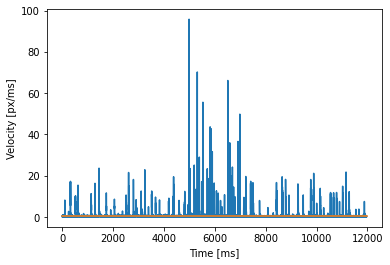

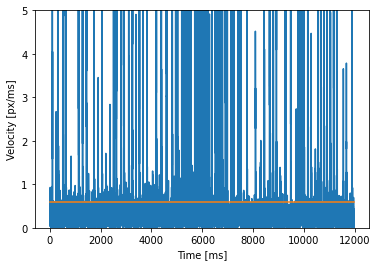

In [ ]:
# Visualisation of v_threshold
y1=ivt(x, v_threshold=0.6,verbose=1)

In [ ]:
#y1=ivt(x, v_threshold=2)

In [ ]:
x.shape

(11973, 2)

In [ ]:
#y1=(y1[:-1])
y=(y[:-1])


In [ ]:
thresholds=[x/10 for x in range(0,20)]

from sklearn.metrics import classification_report,accuracy_score, confusion_matrix, precision_score, cohen_kappa_score, recall_score
fixation_recall=[]
fixation_precision=[]
fixation_f1_score=[]
saccade_recall=[]
saccade_precision=[]
saccade_f1_score=[]
cohen_kappa=[]


for t in thresholds:
  y1=ivt(x, v_threshold=t)[0]
  y_pred=np.array(y1)
  #print(len(y_real))
 # print(len(y_pred))
  cm=confusion_matrix(y, y_pred)
  #print(cm)
  print('classification_report for threshold', t, classification_report(y, y_pred))
  print('Kochen kappa for threshold', t, cohen_kappa_score(y, y_pred))
  print(classification_report(y,y_pred))
  #print(classification_report(y,y_pred['f1-score']))
  #Fixation accuracy calculation
  sumf=cm[0][0]+cm[0][1]
  Tc=cm[0][0]
  fixation_recall.append(Tc*100/sumf)
  print('Fixation recall at threshol',t, 'is', fixation_recall[-1])
  #fixation precision 
  sumfp=cm[0][0]+cm[1][0]
  Tcfp=cm[0][0]
  fixation_precision.append(Tcfp*100/sumfp)
  print('Fixation precission at threshold', t, 'is', fixation_precision[-1])
  #fixation f1_score
  multiple_recal_prec=2*((Tcfp*100/sumfp)*(Tc*100/sumf))
  add_recall_prec=((Tc*100/sumf)+Tcfp*100/sumfp)
  result_f1_score=multiple_recal_prec/add_recall_prec
  fixation_f1_score.append(result_f1_score)
  print('fixation_f1_score for threshold', t, 'is', fixation_f1_score[-1])
  #Saccade accuracy calculation
  sums=cm[1][0]+cm[1][1]
  Tcs=cm[1][1]
  saccade_recall.append(Tcs*100/sums)
  print('Saccade recall at threshol',t, 'is', saccade_recall[-1])
  #Saccade precison
  sum_saccP=cm[0][1]+cm[1][1]
  Tc_saccP=cm[1][1]
  saccade_precision.append(Tc_saccP*100/sum_saccP)
  print('saccade_precision for threshold', t, 'is', saccade_precision[-1])
  #saccade f1_score
  multiply=2*((Tc_saccP*100/sum_saccP)*(Tcs*100/sums))
  addition=(Tcs*100/sums)+(Tc_saccP*100/sum_saccP)
  saccade_f1_score.append(multiply/addition)
  print('saccade_f1_score for threshold', t, 'is', saccade_f1_score[-1])
  print('treshold=', t)
  
  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

classification_report for threshold 0.0               precision    recall  f1-score   support

           1       0.00      0.00      0.00     10092
           2       0.10      1.00      0.18      1196
           3       0.00      0.00      0.00       684

    accuracy                           0.10     11972
   macro avg       0.03      0.33      0.06     11972
weighted avg       0.01      0.10      0.02     11972

Kochen kappa for threshold 0.0 0.0
              precision    recall  f1-score   support

           1       0.00      0.00      0.00     10092
           2       0.10      1.00      0.18      1196
           3       0.00      0.00      0.00       684

    accuracy                           0.10     11972
   macro avg       0.03      0.33      0.06     11972
weighted avg       0.01      0.10      0.02     11972

Fixation recall at threshol 0.0 is 0.0
Fixation precission at threshold 0.0 is nan
fixation_f1_score for threshold 0.0 is nan
Saccade recall at threshol 0.0 is 100

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

classification_report for threshold 0.1               precision    recall  f1-score   support

           1       0.98      0.25      0.40     10092
           2       0.13      0.98      0.22      1196
           3       0.00      0.00      0.00       684

    accuracy                           0.31     11972
   macro avg       0.37      0.41      0.21     11972
weighted avg       0.84      0.31      0.36     11972

Kochen kappa for threshold 0.1 0.06705241233623682
              precision    recall  f1-score   support

           1       0.98      0.25      0.40     10092
           2       0.13      0.98      0.22      1196
           3       0.00      0.00      0.00       684

    accuracy                           0.31     11972
   macro avg       0.37      0.41      0.21     11972
weighted avg       0.84      0.31      0.36     11972

Fixation recall at threshol 0.1 is 25.28735632183908
Fixation precission at threshold 0.1 is 99.29961089494164
fixation_f1_score for threshold 0.1 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

classification_report for threshold 0.2               precision    recall  f1-score   support

           1       0.97      0.48      0.64     10092
           2       0.16      0.97      0.28      1196
           3       0.00      0.00      0.00       684

    accuracy                           0.50     11972
   macro avg       0.38      0.48      0.31     11972
weighted avg       0.84      0.50      0.57     11972

Kochen kappa for threshold 0.2 0.15374012622031097
              precision    recall  f1-score   support

           1       0.97      0.48      0.64     10092
           2       0.16      0.97      0.28      1196
           3       0.00      0.00      0.00       684

    accuracy                           0.50     11972
   macro avg       0.38      0.48      0.31     11972
weighted avg       0.84      0.50      0.57     11972

Fixation recall at threshol 0.2 is 47.6218787158145
Fixation precission at threshold 0.2 is 99.15411594800908
fixation_f1_score for threshold 0.2 i

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

classification_report for threshold 0.3               precision    recall  f1-score   support

           1       0.97      0.66      0.78     10092
           2       0.22      0.94      0.36      1196
           3       0.00      0.00      0.00       684

    accuracy                           0.65     11972
   macro avg       0.40      0.53      0.38     11972
weighted avg       0.84      0.65      0.69     11972

Kochen kappa for threshold 0.3 0.2570371554483908
              precision    recall  f1-score   support

           1       0.97      0.66      0.78     10092
           2       0.22      0.94      0.36      1196
           3       0.00      0.00      0.00       684

    accuracy                           0.65     11972
   macro avg       0.40      0.53      0.38     11972
weighted avg       0.84      0.65      0.69     11972

Fixation recall at threshol 0.3 is 65.57669441141498
Fixation precission at threshold 0.3 is 98.9237668161435
fixation_f1_score for threshold 0.3 is

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

classification_report for threshold 0.4               precision    recall  f1-score   support

           1       0.96      0.78      0.86     10092
           2       0.29      0.91      0.44      1196
           3       0.00      0.00      0.00       684

    accuracy                           0.75     11972
   macro avg       0.42      0.56      0.43     11972
weighted avg       0.84      0.75      0.77     11972

Kochen kappa for threshold 0.4 0.36083730160304683
              precision    recall  f1-score   support

           1       0.96      0.78      0.86     10092
           2       0.29      0.91      0.44      1196
           3       0.00      0.00      0.00       684

    accuracy                           0.75     11972
   macro avg       0.42      0.56      0.43     11972
weighted avg       0.84      0.75      0.77     11972

Fixation recall at threshol 0.4 is 77.93301625049544
Fixation precission at threshold 0.4 is 98.70732931726907
fixation_f1_score for threshold 0.4 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

classification_report for threshold 0.5               precision    recall  f1-score   support

           1       0.96      0.86      0.91     10092
           2       0.37      0.89      0.52      1196
           3       0.00      0.00      0.00       684

    accuracy                           0.82     11972
   macro avg       0.44      0.59      0.48     11972
weighted avg       0.85      0.82      0.82     11972

Kochen kappa for threshold 0.5 0.45857954083430463
              precision    recall  f1-score   support

           1       0.96      0.86      0.91     10092
           2       0.37      0.89      0.52      1196
           3       0.00      0.00      0.00       684

    accuracy                           0.82     11972
   macro avg       0.44      0.59      0.48     11972
weighted avg       0.85      0.82      0.82     11972

Fixation recall at threshol 0.5 is 86.34562029330162
Fixation precission at threshold 0.5 is 98.56351091505486
fixation_f1_score for threshold 0.5 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

classification_report for threshold 0.6               precision    recall  f1-score   support

           1       0.96      0.92      0.94     10092
           2       0.46      0.87      0.60      1196
           3       0.00      0.00      0.00       684

    accuracy                           0.86     11972
   macro avg       0.47      0.60      0.51     11972
weighted avg       0.85      0.86      0.85     11972

Kochen kappa for threshold 0.6 0.5361476326363349
              precision    recall  f1-score   support

           1       0.96      0.92      0.94     10092
           2       0.46      0.87      0.60      1196
           3       0.00      0.00      0.00       684

    accuracy                           0.86     11972
   macro avg       0.47      0.60      0.51     11972
weighted avg       0.85      0.86      0.85     11972

Fixation recall at threshol 0.6 is 91.81529924692826
Fixation precission at threshold 0.6 is 98.39651693745354
fixation_f1_score for threshold 0.6 i

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

classification_report for threshold 0.7               precision    recall  f1-score   support

           1       0.95      0.95      0.95     10092
           2       0.53      0.86      0.66      1196
           3       0.00      0.00      0.00       684

    accuracy                           0.89     11972
   macro avg       0.49      0.60      0.54     11972
weighted avg       0.86      0.89      0.87     11972

Kochen kappa for threshold 0.7 0.5852242606744402
              precision    recall  f1-score   support

           1       0.95      0.95      0.95     10092
           2       0.53      0.86      0.66      1196
           3       0.00      0.00      0.00       684

    accuracy                           0.89     11972
   macro avg       0.49      0.60      0.54     11972
weighted avg       0.86      0.89      0.87     11972

Fixation recall at threshol 0.7 is 94.86722156163297
Fixation precission at threshold 0.7 is 98.23517340447363
fixation_f1_score for threshold 0.7 i

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

classification_report for threshold 0.8               precision    recall  f1-score   support

           1       0.95      0.97      0.96     10092
           2       0.60      0.84      0.70      1196
           3       0.00      0.00      0.00       684

    accuracy                           0.90     11972
   macro avg       0.52      0.60      0.55     11972
weighted avg       0.86      0.90      0.88     11972

Kochen kappa for threshold 0.8 0.6167312104033253
              precision    recall  f1-score   support

           1       0.95      0.97      0.96     10092
           2       0.60      0.84      0.70      1196
           3       0.00      0.00      0.00       684

    accuracy                           0.90     11972
   macro avg       0.52      0.60      0.55     11972
weighted avg       0.86      0.90      0.88     11972

Fixation recall at threshol 0.8 is 96.76971858898138
Fixation precission at threshold 0.8 is 98.10145655449523
fixation_f1_score for threshold 0.8 i

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

classification_report for threshold 0.9               precision    recall  f1-score   support

           1       0.94      0.98      0.96     10092
           2       0.64      0.81      0.72      1196
           3       0.00      0.00      0.00       684

    accuracy                           0.91     11972
   macro avg       0.53      0.60      0.56     11972
weighted avg       0.86      0.91      0.88     11972

Kochen kappa for threshold 0.9 0.6233483367203334
              precision    recall  f1-score   support

           1       0.94      0.98      0.96     10092
           2       0.64      0.81      0.72      1196
           3       0.00      0.00      0.00       684

    accuracy                           0.91     11972
   macro avg       0.53      0.60      0.56     11972
weighted avg       0.86      0.91      0.88     11972

Fixation recall at threshol 0.9 is 97.79032897344432
Fixation precission at threshold 0.9 is 97.78064004755771
fixation_f1_score for threshold 0.9 i

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

classification_report for threshold 1.0               precision    recall  f1-score   support

           1       0.94      0.98      0.96     10092
           2       0.68      0.80      0.73      1196
           3       0.00      0.00      0.00       684

    accuracy                           0.91     11972
   macro avg       0.54      0.59      0.57     11972
weighted avg       0.86      0.91      0.88     11972

Kochen kappa for threshold 1.0 0.6287690928431444
              precision    recall  f1-score   support

           1       0.94      0.98      0.96     10092
           2       0.68      0.80      0.73      1196
           3       0.00      0.00      0.00       684

    accuracy                           0.91     11972
   macro avg       0.54      0.59      0.57     11972
weighted avg       0.86      0.91      0.88     11972

Fixation recall at threshol 1.0 is 98.46413000396353
Fixation precission at threshold 1.0 is 97.60337884294273
fixation_f1_score for threshold 1.0 i

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

classification_report for threshold 1.1               precision    recall  f1-score   support

           1       0.94      0.99      0.96     10092
           2       0.71      0.78      0.74      1196
           3       0.00      0.00      0.00       684

    accuracy                           0.91     11972
   macro avg       0.55      0.59      0.57     11972
weighted avg       0.86      0.91      0.88     11972

Kochen kappa for threshold 1.1 0.6283587962074393
              precision    recall  f1-score   support

           1       0.94      0.99      0.96     10092
           2       0.71      0.78      0.74      1196
           3       0.00      0.00      0.00       684

    accuracy                           0.91     11972
   macro avg       0.55      0.59      0.57     11972
weighted avg       0.86      0.91      0.88     11972

Fixation recall at threshol 1.1 is 98.87039239001189
Fixation precission at threshold 1.1 is 97.43189141685383
fixation_f1_score for threshold 1.1 i

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

classification_report for threshold 1.2               precision    recall  f1-score   support

           1       0.93      0.99      0.96     10092
           2       0.74      0.76      0.75      1196
           3       0.00      0.00      0.00       684

    accuracy                           0.91     11972
   macro avg       0.56      0.58      0.57     11972
weighted avg       0.86      0.91      0.88     11972

Kochen kappa for threshold 1.2 0.6233603766322211
              precision    recall  f1-score   support

           1       0.93      0.99      0.96     10092
           2       0.74      0.76      0.75      1196
           3       0.00      0.00      0.00       684

    accuracy                           0.91     11972
   macro avg       0.56      0.58      0.57     11972
weighted avg       0.86      0.91      0.88     11972

Fixation recall at threshol 1.2 is 99.17756638921918
Fixation precission at threshold 1.2 is 97.21250971250971
fixation_f1_score for threshold 1.2 i

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

classification_report for threshold 1.3               precision    recall  f1-score   support

           1       0.93      0.99      0.96     10092
           2       0.76      0.74      0.75      1196
           3       0.00      0.00      0.00       684

    accuracy                           0.91     11972
   macro avg       0.56      0.58      0.57     11972
weighted avg       0.86      0.91      0.88     11972

Kochen kappa for threshold 1.3 0.6182000946648485
              precision    recall  f1-score   support

           1       0.93      0.99      0.96     10092
           2       0.76      0.74      0.75      1196
           3       0.00      0.00      0.00       684

    accuracy                           0.91     11972
   macro avg       0.56      0.58      0.57     11972
weighted avg       0.86      0.91      0.88     11972

Fixation recall at threshol 1.3 is 99.41537851763773
Fixation precission at threshold 1.3 is 97.03094777562863
fixation_f1_score for threshold 1.3 i

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

classification_report for threshold 1.4               precision    recall  f1-score   support

           1       0.93      1.00      0.96     10092
           2       0.78      0.72      0.75      1196
           3       0.00      0.00      0.00       684

    accuracy                           0.91     11972
   macro avg       0.57      0.57      0.57     11972
weighted avg       0.86      0.91      0.88     11972

Kochen kappa for threshold 1.4 0.6104787374465952
              precision    recall  f1-score   support

           1       0.93      1.00      0.96     10092
           2       0.78      0.72      0.75      1196
           3       0.00      0.00      0.00       684

    accuracy                           0.91     11972
   macro avg       0.57      0.57      0.57     11972
weighted avg       0.86      0.91      0.88     11972

Fixation recall at threshol 1.4 is 99.60364645263576
Fixation precission at threshold 1.4 is 96.83074848280512
fixation_f1_score for threshold 1.4 i

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

classification_report for threshold 1.5               precision    recall  f1-score   support

           1       0.92      1.00      0.96     10092
           2       0.80      0.71      0.75      1196
           3       0.00      0.00      0.00       684

    accuracy                           0.91     11972
   macro avg       0.57      0.57      0.57     11972
weighted avg       0.86      0.91      0.88     11972

Kochen kappa for threshold 1.5 0.601105725575626
              precision    recall  f1-score   support

           1       0.92      1.00      0.96     10092
           2       0.80      0.71      0.75      1196
           3       0.00      0.00      0.00       684

    accuracy                           0.91     11972
   macro avg       0.57      0.57      0.57     11972
weighted avg       0.86      0.91      0.88     11972

Fixation recall at threshol 1.5 is 99.6928260007927
Fixation precission at threshold 1.5 is 96.63817116511382
fixation_f1_score for threshold 1.5 is 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

classification_report for threshold 1.6               precision    recall  f1-score   support

           1       0.92      1.00      0.96     10092
           2       0.80      0.69      0.74      1196
           3       0.00      0.00      0.00       684

    accuracy                           0.91     11972
   macro avg       0.57      0.56      0.57     11972
weighted avg       0.86      0.91      0.88     11972

Kochen kappa for threshold 1.6 0.5906368539157677
              precision    recall  f1-score   support

           1       0.92      1.00      0.96     10092
           2       0.80      0.69      0.74      1196
           3       0.00      0.00      0.00       684

    accuracy                           0.91     11972
   macro avg       0.57      0.56      0.57     11972
weighted avg       0.86      0.91      0.88     11972

Fixation recall at threshol 1.6 is 99.72255251684503
Fixation precission at threshold 1.6 is 96.45390070921985
fixation_f1_score for threshold 1.6 i

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

classification_report for threshold 1.7               precision    recall  f1-score   support

           1       0.92      1.00      0.96     10092
           2       0.82      0.68      0.74      1196
           3       0.00      0.00      0.00       684

    accuracy                           0.91     11972
   macro avg       0.58      0.56      0.57     11972
weighted avg       0.85      0.91      0.88     11972

Kochen kappa for threshold 1.7 0.5842203652328357
              precision    recall  f1-score   support

           1       0.92      1.00      0.96     10092
           2       0.82      0.68      0.74      1196
           3       0.00      0.00      0.00       684

    accuracy                           0.91     11972
   macro avg       0.58      0.56      0.57     11972
weighted avg       0.85      0.91      0.88     11972

Fixation recall at threshol 1.7 is 99.76218787158145
Fixation precission at threshold 1.7 is 96.3444976076555
fixation_f1_score for threshold 1.7 is

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

classification_report for threshold 1.8               precision    recall  f1-score   support

           1       0.92      1.00      0.96     10092
           2       0.83      0.67      0.74      1196
           3       0.00      0.00      0.00       684

    accuracy                           0.91     11972
   macro avg       0.58      0.56      0.57     11972
weighted avg       0.85      0.91      0.88     11972

Kochen kappa for threshold 1.8 0.5794763241901463
              precision    recall  f1-score   support

           1       0.92      1.00      0.96     10092
           2       0.83      0.67      0.74      1196
           3       0.00      0.00      0.00       684

    accuracy                           0.91     11972
   macro avg       0.58      0.56      0.57     11972
weighted avg       0.85      0.91      0.88     11972

Fixation recall at threshol 1.8 is 99.82164090368609
Fixation precission at threshold 1.8 is 96.2545385056373
fixation_f1_score for threshold 1.8 is

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

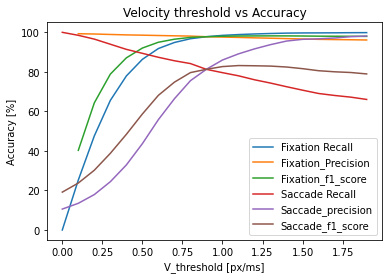

In [ ]:
plt.plot(thresholds, fixation_recall, label="Fixation Recall")
plt.plot(thresholds, fixation_precision, label="Fixation_Precision")
plt.plot(thresholds, fixation_f1_score, label="Fixation_f1_score")
plt.plot(thresholds, saccade_recall, label="Saccade Recall")
plt.plot(thresholds, saccade_precision, label="Saccade_precision")
plt.plot(thresholds, saccade_f1_score, label="Saccade_f1_score")



#plt.plot(thresholds, accuracy, label="Acuracy")
plt.xlabel("V_threshold [px/ms]")
plt.ylabel("Accuracy [%]")
plt.title("Velocity threshold vs Accuracy")
plt.legend()
plt.show()

In [ ]:
print('Fixation recla=', fixation_recall)
print('saccade acuracy=', saccade_recall)

Fixation recla= [0.0, 25.28735632183908, 47.6218787158145, 65.57669441141498, 77.93301625049544, 86.34562029330162, 91.81529924692826, 94.86722156163297, 96.76971858898138, 97.79032897344432, 98.46413000396353, 98.87039239001189, 99.17756638921918, 99.41537851763773, 99.60364645263576, 99.6928260007927, 99.72255251684503, 99.76218787158145, 99.82164090368609, 99.85136741973841]
saccade acuracy= [100.0, 98.49498327759197, 96.57190635451505, 93.9799331103679, 91.38795986622074, 89.38127090301003, 87.37458193979933, 85.61872909698997, 84.19732441471572, 81.27090301003345, 79.59866220735786, 78.01003344481606, 76.00334448160535, 74.33110367892976, 72.49163879598662, 70.73578595317726, 69.06354515050167, 68.06020066889631, 67.22408026755853, 66.05351170568562]
